<a href="https://www.kaggle.com/code/rashidulhaqyousafzai/analysis-of-pokemon-data?scriptVersionId=136920941" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pokemon/Pokemon.csv


In [2]:
df = pd.read_csv("/kaggle/input/pokemon/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Dataset and Analysis Questions Source
**Dataset:**
This dataset is from kaggle. <br>
**Questions:**
The question are taken from the [Datawars](https://app.datawars.io/project/54b07e96-f0da-4b5d-ba40-c87475e42b8e?page=2) just for practice purpose.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<Axes: ylabel='Type 1'>

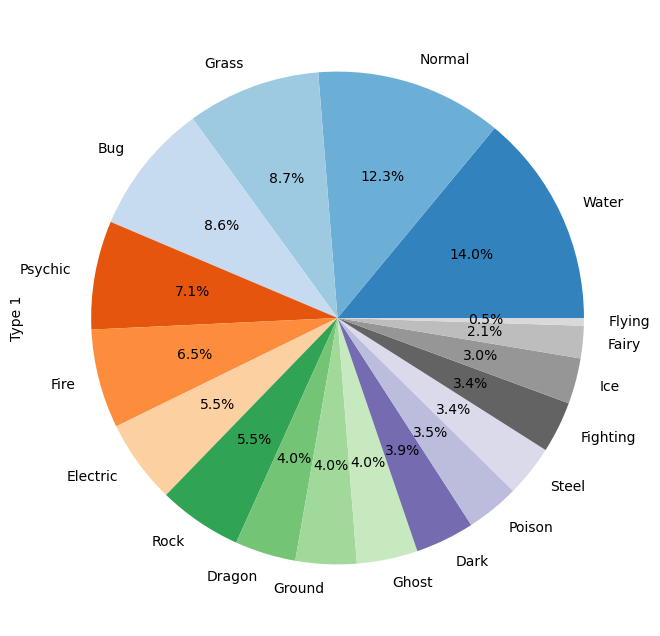

In [5]:
df["Type 1"].value_counts().plot(kind="pie",autopct="%1.1f%%",cmap='tab20c',figsize=(10,8))

### Distribution of Pokemon Totals 

In [6]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<Axes: ylabel='Frequency'>

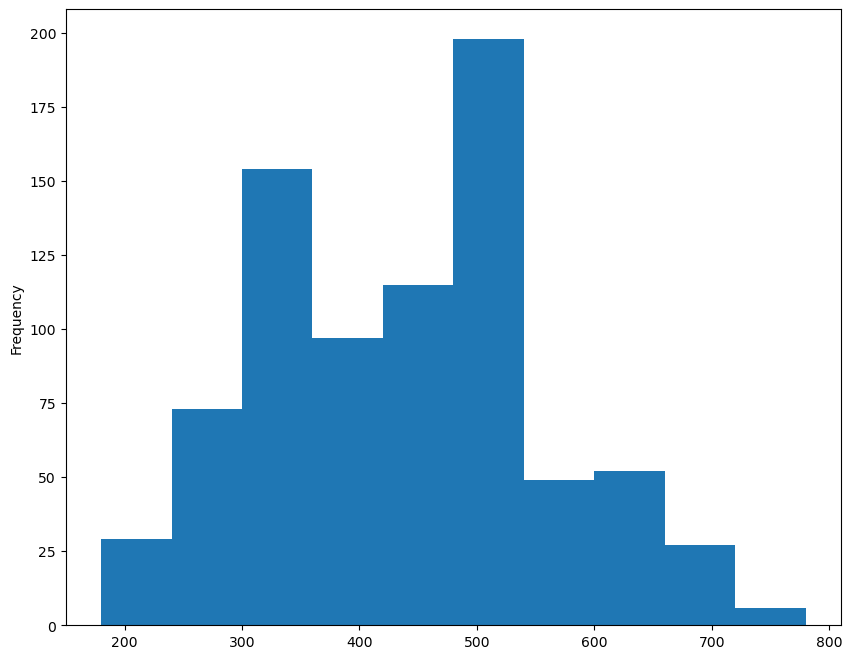

In [7]:
df["Total"].plot(kind='hist',figsize=(10,8))

<Axes: >

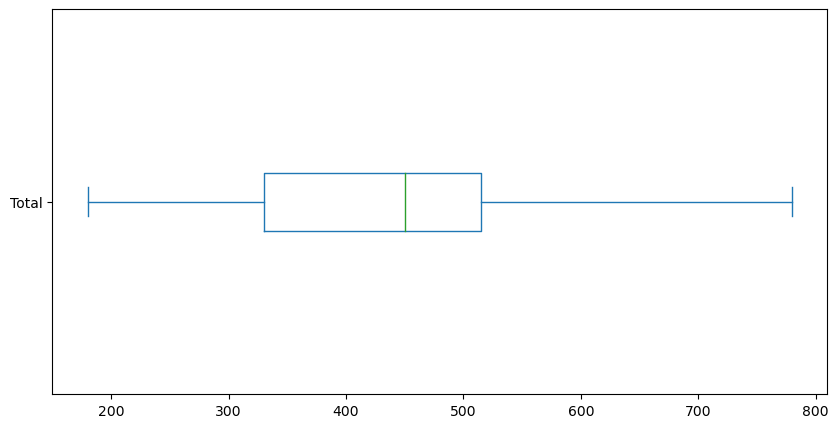

In [8]:
df["Total"].plot(kind='box',vert=False,figsize=(10,5))

### Distribution of legendary pokemons

<Axes: ylabel='Legendary'>

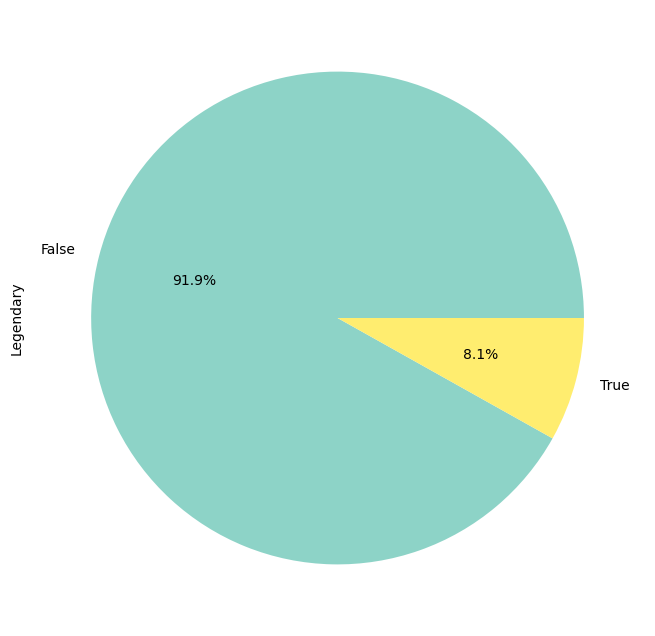

In [9]:
df["Legendary"].value_counts().plot(kind="pie",autopct="%1.1f%%",cmap="Set3",figsize=(10,8))

## Basic filtering 

**1. How many Pokemons exist with an Attack value greater than 150?**

<Axes: xlabel='Attack'>

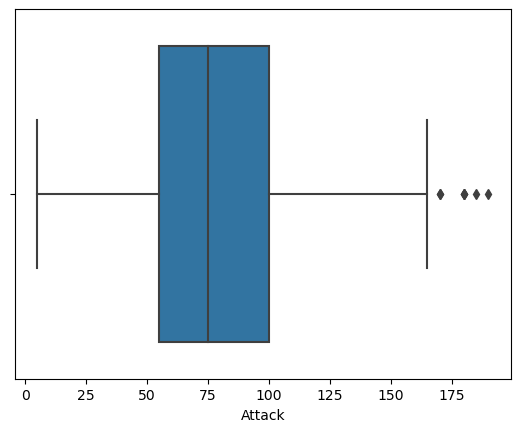

In [10]:
import seaborn as sns
sns.boxplot(data=df, x='Attack')

In [11]:
df["Attack"]>150 # returns boolean array

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796     True
797    False
798     True
799    False
Name: Attack, Length: 800, dtype: bool

In [12]:
(df["Attack"]>150).sum() # it will return the no of true values

18

In [13]:
# we can visualize it using the df.loc method
df.loc[df["Attack"]>150]
# we can also use df.query for the same method as
df.query("Attack > 150 ")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
387,354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


**2. Select all pokemons with a Speed of 10 or less**

<Axes: xlabel='Speed'>

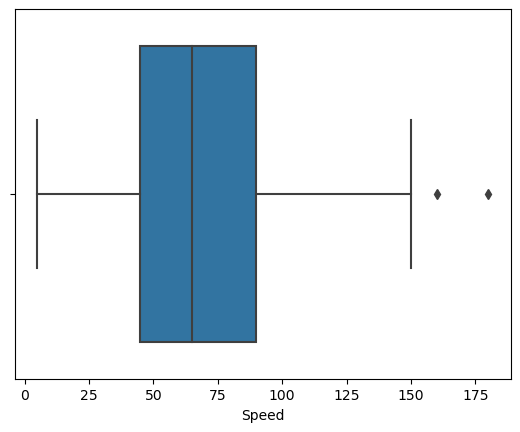

In [14]:
sns.boxplot(data=df,x="Speed")

In [15]:
df.loc[df["Speed"]<=10]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
359,328,Trapinch,Ground,NaN,290,45,100,45,45,45,10,3,False
486,438,Bonsly,Rock,NaN,290,50,80,95,10,45,10,4,False
495,446,Munchlax,Normal,NaN,390,135,85,40,40,85,5,4,False
658,597,Ferroseed,Grass,Steel,305,44,50,91,24,86,10,5,False


**3. How many Pokemons have a Sp. Def value of 25 or less?**

In [16]:
(df["Sp. Def"]<=25).sum()

18

In [17]:
df.loc[df["Sp. Def"]<=25]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,False
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False
17,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
106,98,Krabby,Water,NaN,325,30,105,90,25,25,50,1,False
125,116,Horsea,Water,NaN,295,30,40,70,70,25,60,1,False
139,129,Magikarp,Water,NaN,200,20,10,55,15,20,80,1,False
188,174,Igglybuff,Normal,Fairy,210,90,30,15,40,20,15,2,False


**4. Select all the Legendary pokemons**

In [18]:
df.info() # to see the type of legendary column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [19]:
# since legendary is bool so 
df["Legendary"].sum() # will return the no of true values
df.loc[df["Legendary"]].shape

(65, 13)

In [20]:
#  if we want the false values we can use ~ sign
df.loc[~df["Legendary"]].shape

(735, 13)

**5. Find the outlier**

Text(150, 10, "Who's this guy?")

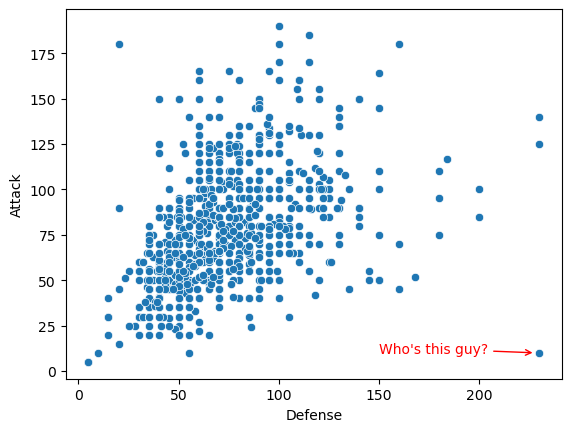

In [21]:
ax = sns.scatterplot(data=df,x="Defense",y="Attack")
ax.annotate(
    "Who's this guy?",xy=(228,10),xytext=(150,10),color='red',
    arrowprops=dict(arrowstyle="->",color="red")
)

In [22]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [23]:
# since it has high defense value so we can sort values in descending order to see it
df.sort_values(by="Defense",ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


In [24]:
# we can also sort values by multiple columns like
df.sort_values(by=["Defense","Attack"],ascending=[False,True]).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


**6. How many Fire-Flying Pokemons are there?**

In [25]:
(df["Type 1"]=="Fire").sum() # it will show no of type 1 == fire

52

In [26]:
(df["Type 2"]=="Flying").sum() # it will show no of type 2 == flying

97

In [27]:
# we can combine the above two by and (&) to find pokemon with Type 1 == Fire and Type 2 == Flying as
(
    (df["Type 1"]=="Fire") &
    (df["Type 2"]=="Flying")
).sum()

6

In [28]:
# we can see the above 6 pokemons as
df.loc[(
    (df["Type 1"]=="Fire") &
    (df["Type 2"]=="Flying")
)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


In [29]:
# in pandas we use & as and, | as or, and ~ as not but 
# in case of query method we use normal python operator 
# like and, or, not for example the above can be written as
df.query("`Type 1`== 'Fire' and `Type 2`=='Flying'")
# in query method we use `` sign for column names that contain spaces

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
730,662,Fletchinder,Fire,Flying,382,62,73,55,56,52,84,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False


**7. How many 'Poison' pokemons are across both types?** 

In [30]:
df["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [31]:
df["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [32]:
# here we will use | operator to find rows of either type 1 == poison or type 2 or both
(
    (df["Type 1"]=="Poison") |
    (df["Type 2"]=="Poison")
).sum()

62

In [33]:
# if we use query method we will use or
df.query("`Type 1`=='Poison' or `Type 2`=='Poison'").shape

(62, 13)

**8. What pokemon of Type 1 Ice has the strongest defense?**

In [34]:

# df.loc[df["Type 1"]=="Ice"] will find value with ice
df.loc[df["Type 1"]=="Ice","Defense"].max() # it will show the max value of defense

184

In [35]:
# Now we can see the value using the above value as
df.loc[
    (df["Type 1"]=="Ice")&
    (df["Defense"]==df.loc[df["Type 1"]=="Ice","Defense"].max())
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


In [36]:
# The above value can also be find as
df.loc[df["Type 1"]=="Ice"].sort_values("Defense",ascending=False).head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False


**9. What's the most common type of Legendary Pokemons?**

In [37]:
df.loc[df["Legendary"],"Type 1"].value_counts()
# psychic

Psychic     14
Dragon      12
Fire         5
Electric     4
Water        4
Rock         4
Steel        4
Ground       4
Grass        3
Ice          2
Normal       2
Ghost        2
Dark         2
Flying       2
Fairy        1
Name: Type 1, dtype: int64

<Axes: >

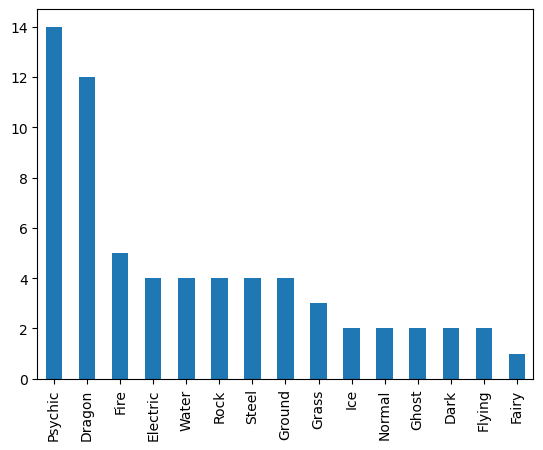

In [38]:
df.loc[df["Legendary"],"Type 1"].value_counts().plot(kind="bar")

**10. What's the most powerful pokemon from the first 3 generations, of type water?**

<Axes: >

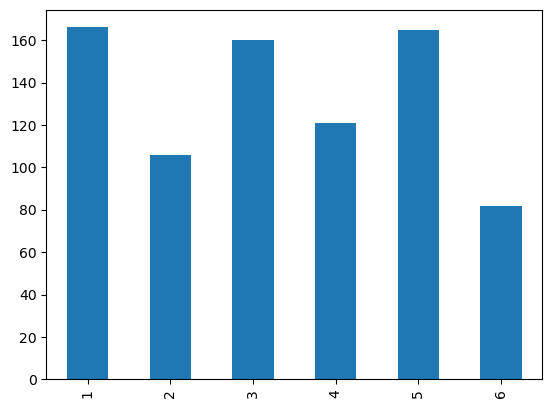

In [39]:
df["Generation"].value_counts(sort=False).plot(kind="bar")

In [40]:
# to find the dataframe of 1,2 and 3 generation we will do
(
    (df["Generation"]==1)|
    (df["Generation"]==2) |
    (df["Generation"]==3)
).sum()

432

In [41]:
# This gives us the same output as above
df["Generation"].isin([1,2,3]).sum()

432

In [42]:
df.loc[
    (df["Type 1"]=="Water")&
    df["Generation"].isin([1,2,3])
].sort_values(by="Total",ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
283,260,SwampertMega Swampert,Water,Ground,635,100,150,110,95,110,70,3,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False


**11. What's the most powerful Dragon from the last two generations?¶**

In [43]:
df.loc[
    (
        (df["Type 1"]=="Dragon")|
        (df["Type 2"]=="Dragon")
    )&
    df["Generation"].isin([5,6])
].sort_values(by="Total",ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
710,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True


In [44]:
# we can use query method for the above as well
df.query(
"(`Type 1`=='Dragon' or `Type 2`=='Dragon') and Generation in [5,6]"
).sort_values(by="Total",ascending=False).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90,5,True
707,644,Zekrom,Dragon,Electric,680,100,150,120,120,100,90,5,True
710,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True


**12. Select most powerful Fire-type pokemons**

In [45]:
df.loc[(df["Attack"]>100)&(df["Type 1"]=="Fire")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
354,323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20,3,False
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False


In [46]:
# will output same as above
df.query("Attack>100 and `Type 1`=='Fire'")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
64,59,Arcanine,Fire,NaN,555,90,110,80,100,80,95,1,False
147,136,Flareon,Fire,NaN,525,65,130,60,95,110,65,1,False
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
278,257,Blaziken,Fire,Fighting,530,80,120,70,110,70,80,3,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
354,323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20,3,False
437,392,Infernape,Fire,Fighting,534,76,104,71,104,71,108,4,False


**13. Select all Water-type, Flying-type pokemons**

In [47]:
 df.loc[(df["Type 1"]=="Water")&(df["Type 2"]=="Flying")]
df.query("`Type 1`=='Water' and `Type 2`=='Flying'")

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
301,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False
641,580,Ducklett,Water,Flying,305,62,44,50,44,50,55,5,False
642,581,Swanna,Water,Flying,473,75,87,63,87,63,98,5,False


**14. Select specific columns of Legendary pokemons of type Fire**

In [48]:
df.loc[(df["Legendary"])&(df['Type 1']=='Fire'),['Name', 'Attack','Generation']]

,Name,Attack,Generation
158,Moltres,100,1
263,Entei,115,2
270,Ho-oh,130,2
542,Heatran,90,4
799,Volcanion,110,6


**15. Select Slow and Fast pokemons**

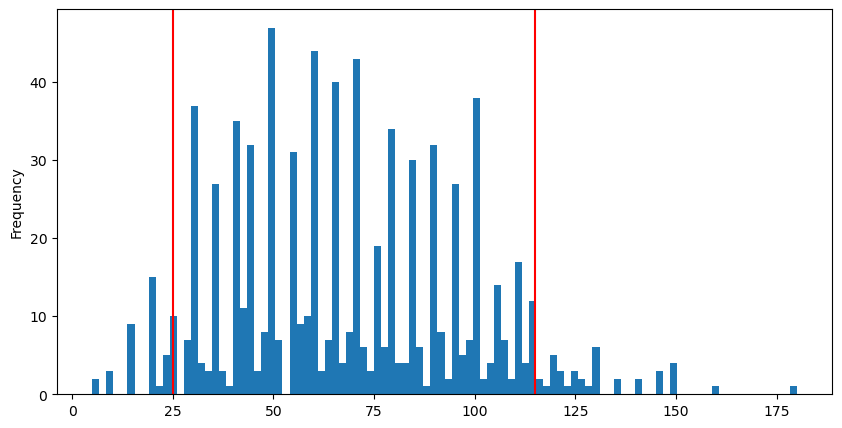

In [49]:
ax = df['Speed'].plot(kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df['Speed'].quantile(.05), color='red')
ax.axvline(df['Speed'].quantile(.95), color='red')

In [50]:
df.loc[
    (df['Speed']<df["Speed"].quantile(.05))|
    (df['Speed']>df["Speed"].quantile(.95))
]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
70,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False
752,682,Spritzee,Fairy,NaN,341,78,52,60,63,65,23,6,False
771,701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False


**16. Find the Ultra Powerful Legendary Pokemon**

Text(160, 150, "Who's this guy?")

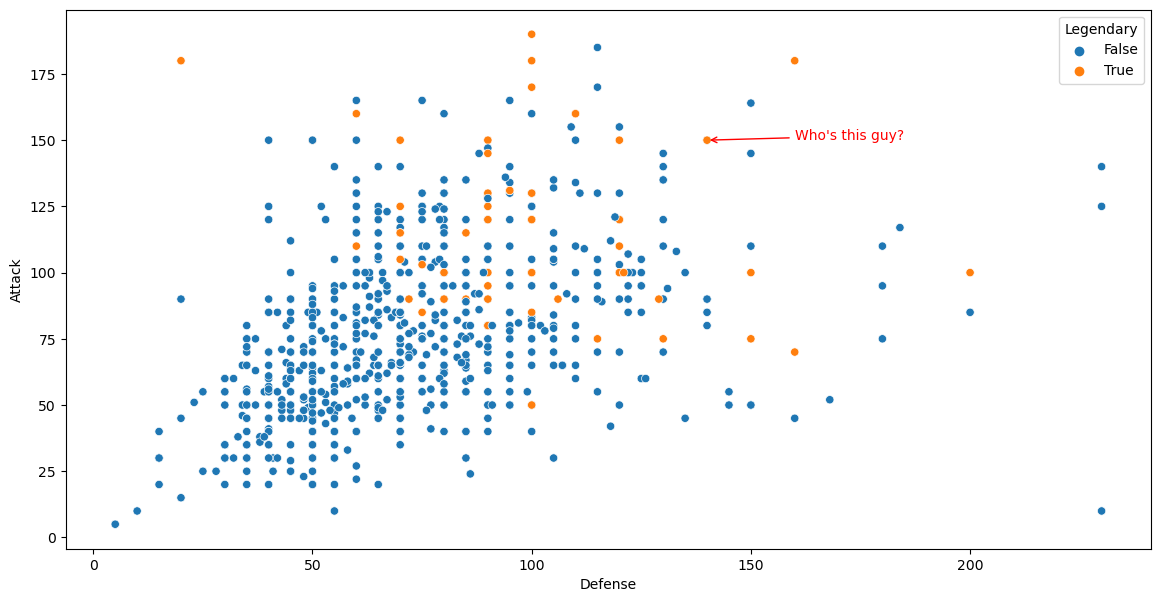

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(data=df, x="Defense", y="Attack", hue='Legendary', ax=ax)
ax.annotate(
    "Who's this guy?", xy=(140, 150), xytext=(160, 150), color='red',
    arrowprops=dict(arrowstyle="->", color='red')
)

In [52]:
df.loc[df['Legendary']].sort_values(by=['Attack','Defense'],ascending=False).iloc[1]

#                               383
Name          GroudonPrimal Groudon
Type 1                       Ground
Type 2                         Fire
Total                           770
HP                              100
Attack                          180
Defense                         160
Sp. Atk                         150
Sp. Def                          90
Speed                            90
Generation                        3
Legendary                      True
Name: 424, dtype: object